In [75]:
import os
import numpy as np
from skimage.io import imread,imshow
from skimage import measure,color,io,feature
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
import keras.utils
from keras.datasets import mnist
from keras import backend as K
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
% matplotlib inline

In [76]:
x=[]
y=[]
path='C:/Users/Bermuda/OneDrive/Workshop/Dataset'
for fname in os.listdir(path):
    print(fname,end=' ')
    paths=path+'/'+str(fname)
    for iname in os.listdir(paths):
        #print(iname,end=' ')
        pathss=paths+'/'+str(iname)
        img=imread(pathss)
#         img_gray=color.rgb2gray(img)
        x.append(img)
        y.append(fname)
x=np.array(x)
y=np.array(y)
print(x.shape)

0 1 2 3 4 5 6 7 8 9 (190, 100, 100, 3)


In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.30, random_state=507)
print(x_test.shape)

(57, 100, 100, 3)


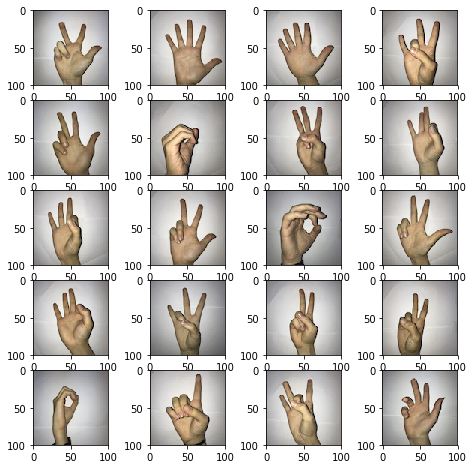

In [78]:
index = np.random.choice(x_train.shape[0], 21, replace=False)
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns * rows + 1):
    img = x_train[index[i]]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [79]:
num_classes = 10

x_train = x_train.reshape(133, 100, 100, 3)
x_test = x_test.reshape(57, 100, 100, 3)

# x_train /= 255  # normalize dataset
# x_test /= 255

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

133 train samples
57 test samples


In [84]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(100, 100, 3))) #padding='same'ทำzero padding มาให้
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [85]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 100, 100, 64)      1792      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 25, 25, 128)       147584    
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 12, 12, 256)       295168    
__________

In [86]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
model.fit(x_train, y_train,
          batch_size=20,
          epochs=100,
          validation_split=0.2)

Train on 106 samples, validate on 27 samples
Epoch 1/100
106/106 [==============================] - 12s 112ms/step - loss: 13.6852 - acc: 0.1509 - val_loss: 13.7302 - val_acc: 0.1481
Epoch 2/100
106/106 [==============================] - 11s 104ms/step - loss: 13.6852 - acc: 0.1509 - val_loss: 13.7302 - val_acc: 0.1481
Epoch 3/100
106/106 [==============================] - 15s 139ms/step - loss: 13.6852 - acc: 0.1509 - val_loss: 13.7302 - val_acc: 0.1481
Epoch 4/100
106/106 [==============================] - 11s 105ms/step - loss: 13.6852 - acc: 0.1509 - val_loss: 13.7302 - val_acc: 0.1481
Epoch 5/100
106/106 [==============================] - 12s 118ms/step - loss: 13.6852 - acc: 0.1509 - val_loss: 13.7302 - val_acc: 0.1481
Epoch 6/100
106/106 [==============================] - 12s 115ms/step - loss: 13.6852 - acc: 0.1509 - val_loss: 13.7302 - val_acc: 0.1481
Epoch 7/100
106/106 [==============================] - 14s 134ms/step - loss: 13.6852 - acc: 0.1509 - val_loss: 13.7302 - val_a

Epoch 60/100
106/106 [==============================] - 12s 116ms/step - loss: 13.6852 - acc: 0.1509 - val_loss: 13.7302 - val_acc: 0.1481
Epoch 61/100
106/106 [==============================] - 13s 124ms/step - loss: 13.6852 - acc: 0.1509 - val_loss: 13.7302 - val_acc: 0.1481
Epoch 62/100
106/106 [==============================] - 14s 134ms/step - loss: 13.6852 - acc: 0.1509 - val_loss: 13.7302 - val_acc: 0.1481
Epoch 63/100
106/106 [==============================] - 12s 115ms/step - loss: 13.6852 - acc: 0.1509 - val_loss: 13.7302 - val_acc: 0.1481
Epoch 64/100
106/106 [==============================] - 14s 134ms/step - loss: 13.6852 - acc: 0.1509 - val_loss: 13.7302 - val_acc: 0.1481
Epoch 65/100
106/106 [==============================] - 14s 132ms/step - loss: 13.6852 - acc: 0.1509 - val_loss: 13.7302 - val_acc: 0.1481
Epoch 66/100
106/106 [==============================] - 16s 152ms/step - loss: 13.6852 - acc: 0.1509 - val_loss: 13.7302 - val_acc: 0.1481
Epoch 67/100
106/106 [=====